# Data Analysis Project

## Business Problem
**client wants us to analyze diwali sales data in order to understand the trends, insights, top performing products, categories, zone so that they can prepare better and improve sales.**

## Data Collection 
- client has provided historial data in csv file.
- Link : https://drive.google.com/file/d/1mGY1doT8RRTgIS0eZsiexHOjUIel9pvo/view?usp=sharing

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
data = pd.read_csv(r"C:\Users\manis\Downloads\Diwali Sales Data.csv", encoding = 'unicode_escape' )
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


In [129]:
df = data.copy()

## Data Pre-processing
- **Data Profiling**
- **Data Cleaning**
- **Error Handling(Data consistancy)**
- **Data Formatting**
- **Outlier Detection and Removal**


In [130]:
df.shape


(11345, 15)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [132]:
# Null values
df.isnull().sum()

User_ID                24
Cust_name               1
Product_ID              4
Gender                  4
Age Group               6
Age                    11
Marital_Status          6
State                  13
Zone                   11
Occupation              6
Product_Category       11
Orders                  3
Amount                 14
Status              11345
unnamed1            11345
dtype: int64

In [133]:
# All columns
all_columns = df.columns
all_columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [134]:
# Numeric columns
numeric_columns = df.select_dtypes(include =np.number).columns
numeric_columns

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [135]:
# Non-numeric columns
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [136]:
# Duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11340    False
11341    False
11342    False
11343     True
11344    False
Length: 11345, dtype: bool

In [137]:
# Filtering out the duplicated entries
df= df[~df.duplicated()]
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


In [138]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [139]:
df["Amount"].unique()

array(['23952', '23934', '23924', ..., '125621259', '876021246', 'abcde'],
      dtype=object)

In [140]:
df['Orders'].value_counts()

Orders
2.0     2911
1.0     2826
4.0     2788
3.0     2775
40.0       1
24.0       1
Name: count, dtype: int64

In [141]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Nndhra\xa0Pradesh', nan, 'Bihar',
       'Rajasthan', 'Haryana', 'Uttarakhand', 'Telangana', 'Punjab'],
      dtype=object)

In [142]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Zentral', 'Eastern',
       nan], dtype=object)

In [143]:
df['Product_ID'].unique()

array(['P00125942', 'P00110942', 'P00118542', ..., 'P00044742',
       'P00296942', nan], dtype=object)

In [144]:
df['Marital_Status'].isnull().sum()

6

### Data profiling
1. **Amount**
    - Need to change the data type from object to integer.
    - the rows corresponding to null values should be dropped.
    - Need to drop the rows corresponding to value 'abcds'.
2. **Status & unnamed1**
    - no data, should be dropped.
3. **Orders**
    - Null values has to be dropped
    - there are outliers which can be removed.
4. **State**
    - Andhra\xa0Pradesh & Nndhra\xa0Pradesh should be replaced with  'Andhra Pradesh'
    - Drop the rows corresponding to null values.
5. **Zones**
    - Drop the rows corresponding to null values
    - Zentral should be replaced with 'Central'
6. **Product_ID**
    - Drop the values corresponding to null values
7. **Marital_Status**
    - Null values can be replaced with code
    - Data type needs to be changed from objects to numeric
8. **Age Group**
    - low-high can be replaced with mode
     - Null values can be replaced with mode
10. **Product_Category**
     - Null values can be dropped
11. **Gender, Occupation**
     - Null values can be replaced with mod
        

### Data cleaning

#### Satus & Unnamed1

In [145]:
#Dropping columns
df.drop(['Status', 'unnamed1'],axis =1,inplace = True)
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934


#### Amount

In [146]:
#changing the data type
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce')
#error = coerce will convert unsupported values into null values

In [147]:
#Dropping rows corresponding to null values in the columns : ['Amount' , 'Orders' , 'State' , 'Zone' ,' Product_ID ', 'Product_Category'] 
df.dropna(subset = ['Amount' , 'Orders' , 'State' , 'Zone' ,'Product_ID', 'Product_Category'] , inplace = True)

#### State & Zone

In [148]:
# replacing the type
df['State'] = df['State'].str.replace('Andhra\xa0Pradesh', 'Andhra Pradesh' )
df['State'] = df['State'].str.replace('Nndhra\xa0Pradesh', 'Andhra Pradesh' )
df['Zone'] = df['Zone'].str.replace('Zentral', 'Central')

##### Procduct_ID 
clearned already

#### Marital_Status

In [149]:
#replacing the null values with mode
marital_status_mode = df['Marital_Status'].mode()[0]
marital_status_mode

df['Marital_Status'] = df['Marital_Status'].fillna(marital_status_mode)

In [150]:
df['Marital_Status'].isna().sum()

0

In [151]:
#Creating a new column with marital_status
df['marraige_status'] =df['Marital_Status'].apply(lambda x: 'Married' if (x==1.) else 'Unmarried')

In [152]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married


#### Age

In [153]:
#changing the data type from object to numeric
df['Age'] =pd.to_numeric(df['Age'], errors ='coerce')

In [154]:
#replace the null values with mode
age_mode = df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(age_mode)

In [155]:
df['Age'].isnull().sum()

0

#### Age Group

In [156]:
#replacing null value and typo with mode
age_group_mode = df['Age Group'].mode()[0]
age_group_mode
df['Age Group'] =df['Age Group'].str.replace('low-high', age_group_mode)
df['Age Group'] =df['Age Group'].fillna(age_group_mode)


In [157]:
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '51-55', '55+', '36-45', '46-50'],
      dtype=object)

In [158]:
df['Age Group'].isna().sum()

0

#### Product category
already executed

#### User_ID, Gender & Occupation

In [159]:
#replacing null values with mode
gender_mode = df['Gender'].mode()[0]
occupation_mode = df['Occupation'].mode()[0]
user_id_mode=df['User_ID'].mode()[0]

df['Gender'] =df['Gender'].fillna(gender_mode)
df['Occupation'] =df['Occupation'].fillna(occupation_mode)
df['User_ID'] =df['User_ID'].fillna(user_id_mode)


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11254 entries, 0 to 11340
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11254 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   Marital_Status    11254 non-null  float64
 7   State             11254 non-null  object 
 8   Zone              11254 non-null  object 
 9   Occupation        11254 non-null  object 
 10  Product_Category  11254 non-null  object 
 11  Orders            11254 non-null  float64
 12  Amount            11254 non-null  float64
 13  marraige_status   11254 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [161]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marraige_status     0
dtype: int64

Text(0.5, 1.0, "Box plot for 'Amount'")

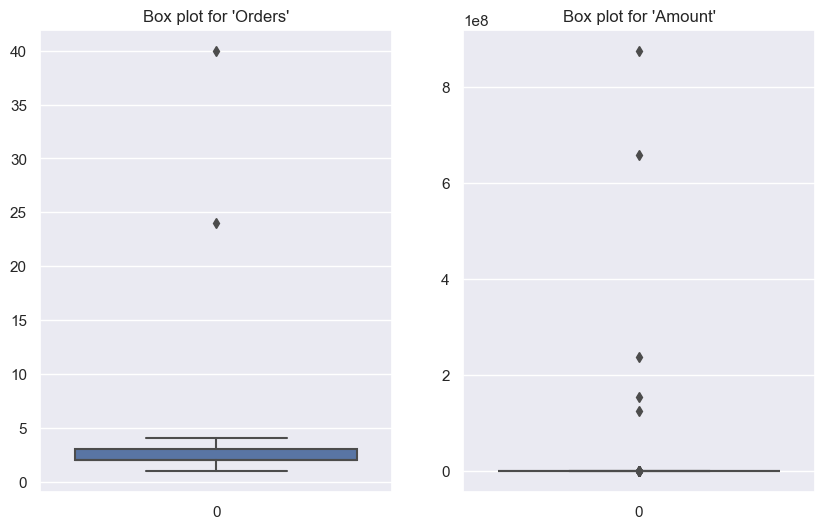

In [162]:
# Visulaization of outliers
fig,ax = plt.subplots(1,2, figsize = (10,6))
sns.boxplot(data = df['Orders'], ax = ax[0])
ax[0].set_title("Box plot for 'Orders'")

sns.boxplot(data = df['Amount'], ax = ax[1])
ax[1].set_title("Box plot for 'Amount'")

#### Order

In [163]:
# Quartile
Q1_order = np.quantile(df['Orders'], 0.25)
Q3_order = np.quantile(df['Orders'], 0.75)
IQR_order = Q3_order - Q1_order
#IQR_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order

In [164]:
print(lower_limit_order)
print(upper_limit_order)

0.5
4.5


In [165]:
# Removing the outliers
df = df[(df['Orders'] > lower_limit_order) & (df['Orders'] < upper_limit_order)]
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married
2,1001990.0,Bindu,P00118542,F,26-35,35.0,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.0,Married
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,0.0,Karnataka,Southern,Construction,Auto,2.0,23912.0,Unmarried
4,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877.0,Married


In [166]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125200e+04,11252.000000,11252.000000,11252.000000,1.125200e+04
mean,1.011889e+06,35.423303,0.419836,2.488891,1.917000e+05
std,2.979871e+05,12.753743,0.493554,1.114844,1.073001e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.444750e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004429e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,4.000000,8.760212e+08


#### Amount


In [167]:
# Quartile
Q1_amount = np.quantile(df['Amount'], 0.25)
Q3_amount = np.quantile(df['Amount'], 0.75)
IQR_amount = Q3_amount - Q1_amount
#IQR_order
lower_limit_amount = Q1_amount - 1.5*IQR_amount
upper_limit_amount = Q3_amount + 1.5*IQR_amount
print(lower_limit_amount)
print(upper_limit_amount)


-5436.625
23580.375


In [168]:
df = df[(df['Amount'] > lower_limit_amount) & (df['Amount'] < upper_limit_amount)]
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
20,1000113.0,Ellis,P00180642,F,26-35,19.0,1.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,Married
21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,Married
22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,Unmarried


In [169]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


In [170]:
#saving the cleaned data
df.to_csv(r"C:\Users\manis\Downloads\Diwali_Sales_Cleaned_Data.csv")

# Exploratory Data Analysis

## Statistical Analysis

In [171]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
20,1000113.0,Ellis,P00180642,F,26-35,19.0,1.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,Married
21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,Married
22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,Unmarried


In [172]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


# Data Visualization

### Gender Wise Analysis

In [173]:
# plot data
data_gender_count = df.groupby(['Gender'], as_index =False)['Orders'].count()
print("Gender wise Purchase Power \n",data_gender_count)

data_gender_amount = df.groupby(['Gender'], as_index =False)['Amount'].sum()
print("Gender wise Purchase Power \n",data_gender_amount)

Gender wise Purchase Power 
   Gender  Orders
0      F    7835
1      M    3399
Gender wise Purchase Power 
   Gender       Amount
0      F  74422989.94
1      M  31769368.00


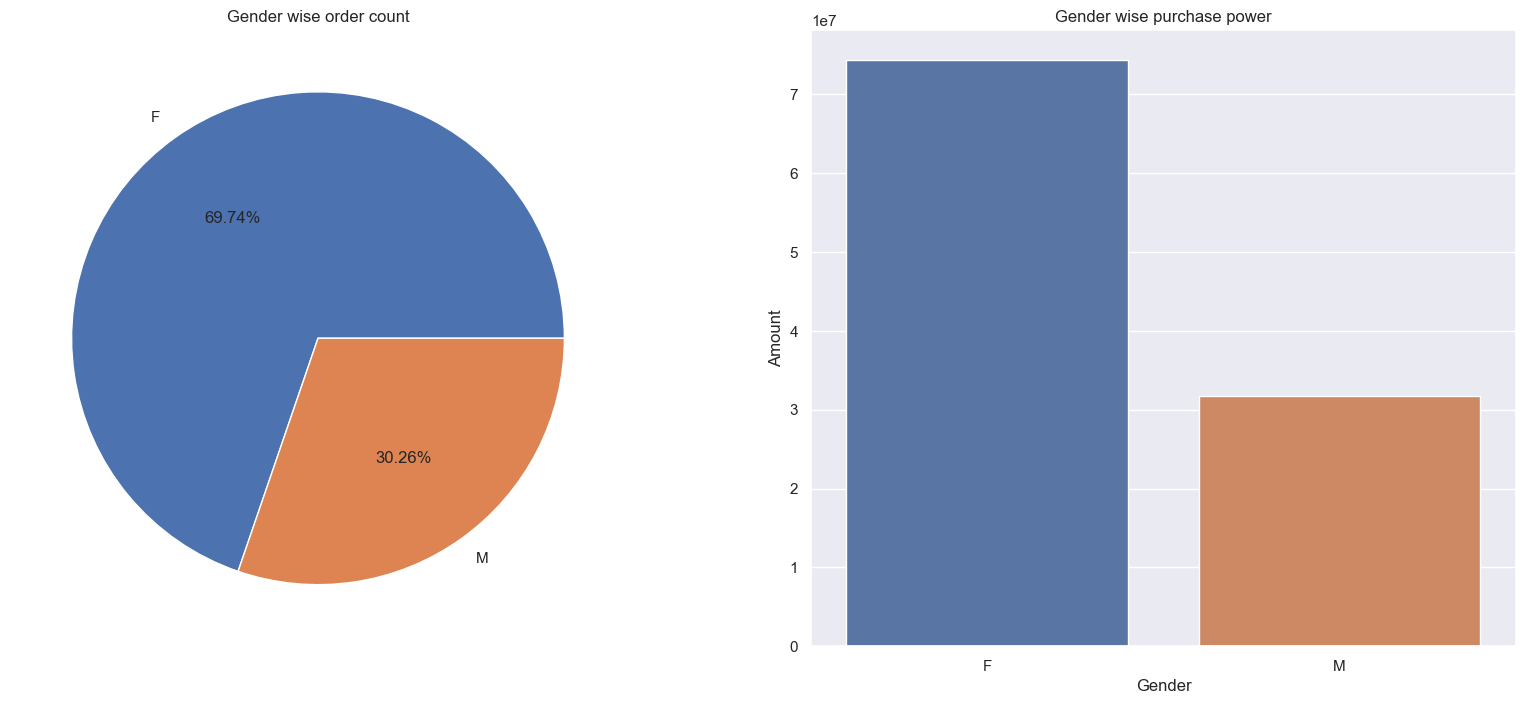

In [174]:
# Plotting
fig,ax = plt.subplots(1,2,figsize =(20, 8))
# Pie chart
ax[0].pie(x=data_gender_count['Orders'],
          labels = data_gender_count['Gender'],autopct ="%1.2f%%")
ax[0].set_title("Gender wise order count")

# Bar chart 
sns.barplot(x = 'Gender' , y ='Amount', data = data_gender_amount, ax = ax[1])
ax[1].set_title("Gender wise purchase power")
plt.show()


#### Conclusion :
Females generally place more order and their purchase power is also higher.

### Marital Status Wise Analysis

In [175]:
data_marraige_status_amount = df.groupby(['marraige_status'], as_index =False)['Amount'].sum()
data_marraige_status_amount

,marraige_status,Amount
0,Married,44003938.00
1,Unmarried,62188419.94


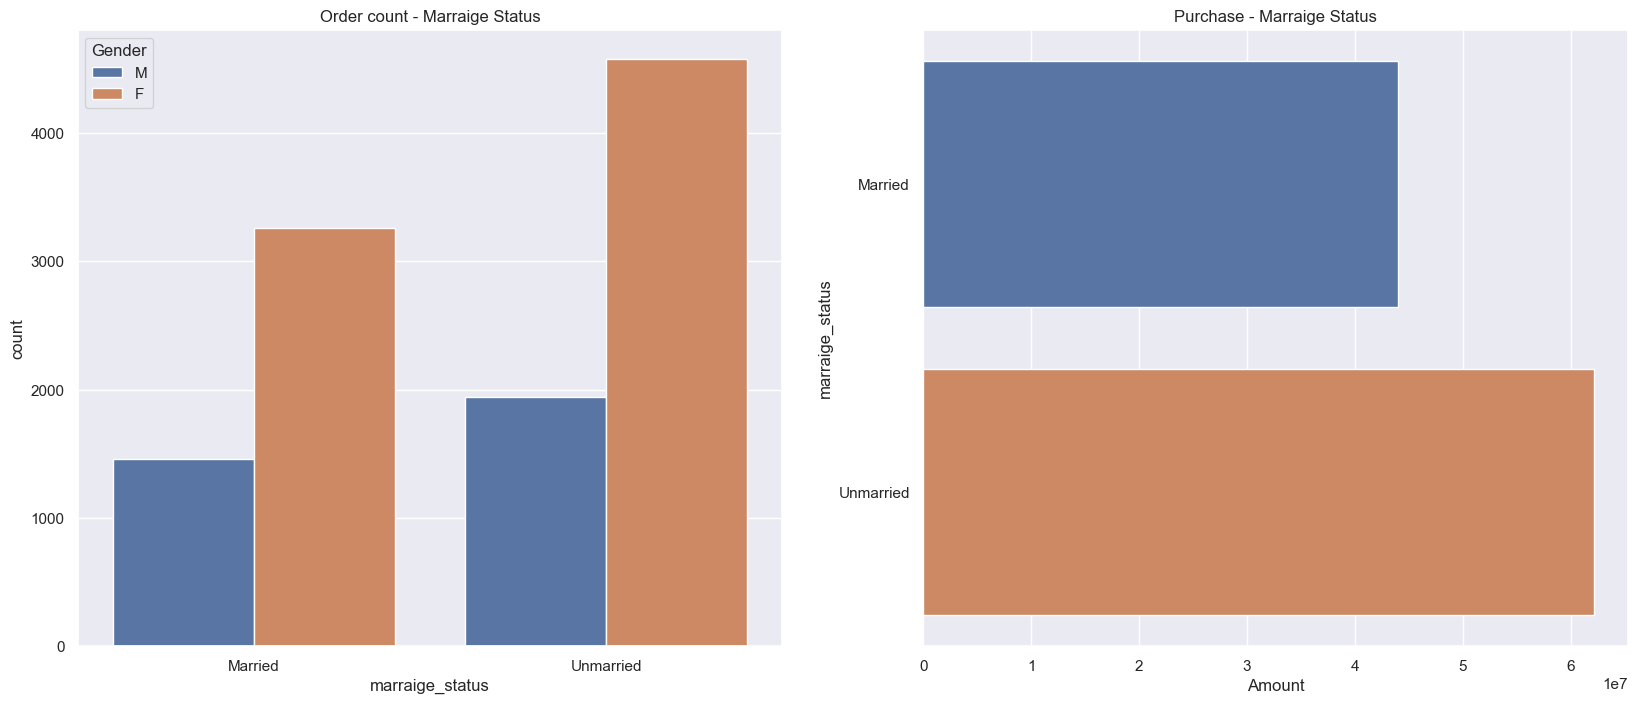

In [176]:
# plots
fig, ax = plt.subplots(1,2, figsize =(20,8))

# Countplot
sns.countplot(x = 'marraige_status', hue ='Gender', data =df ,ax=ax[0])
ax[0].set_title('Order count - Marraige Status')

sns.barplot(y = 'marraige_status', x = 'Amount', orient ='h', data =data_marraige_status_amount, ax = ax[1])
ax[1].set_title('Purchase - Marraige Status')

plt.show()

#### Conclusion
Unmarried females place more order than married female and unmarried male.
 Also unmarried male place more order than married male.


#### Age Group Wise Analysis

In [177]:
data_age_group_amount = df.groupby(['Age Group'], as_index =False)['Amount'].sum()
data_age_group_amount

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17032196.00
2,26-35,42603794.95
3,36-45,22234332.99
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


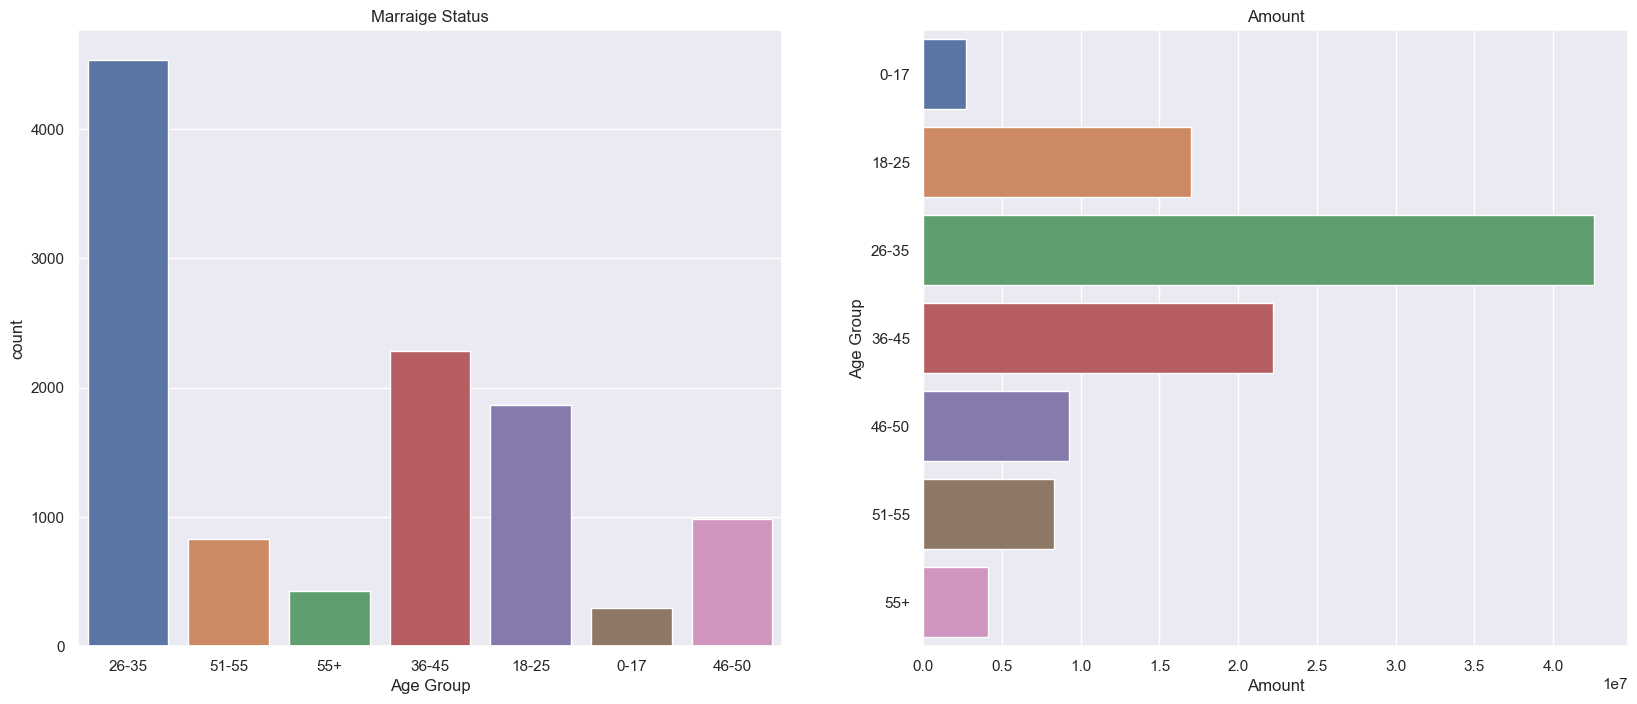

In [178]:
# plots
fig, ax = plt.subplots(1,2, figsize =(20,8))

# Countplot
sns.countplot(x = 'Age Group',  data =df ,ax=ax[0])
ax[0].set_title('Marraige Status')

sns.barplot(y = 'Age Group', x = 'Amount', orient ='h', data =data_age_group_amount, ax = ax[1])
ax[1].set_title('Amount')

plt.show()

#### Conclusion
Age group 26-35 years spend more money.

#### Analysis Parameter
- Gender
- marraige_status
- Age Group
- Product_Category
- State
- Product_ID
- Occupation


#### Product Category Wise Analysis

In [179]:
data_product_category_amount = df.groupby(['Product_Category'], as_index =False)['Amount'].sum()
data_product_category_amount

,Product_Category,Amount
0,Auto,1624503.00
1,Beauty,1959484.00
2,Books,1061478.00
3,Clothing & Apparel,16484472.00
4,Decor,730360.00
5,Electronics & Gadgets,15607657.00
6,Food,33933883.50
7,Footwear & Shoes,16009057.45
8,Furniture,5481325.99
9,Games & Toys,4331694.00


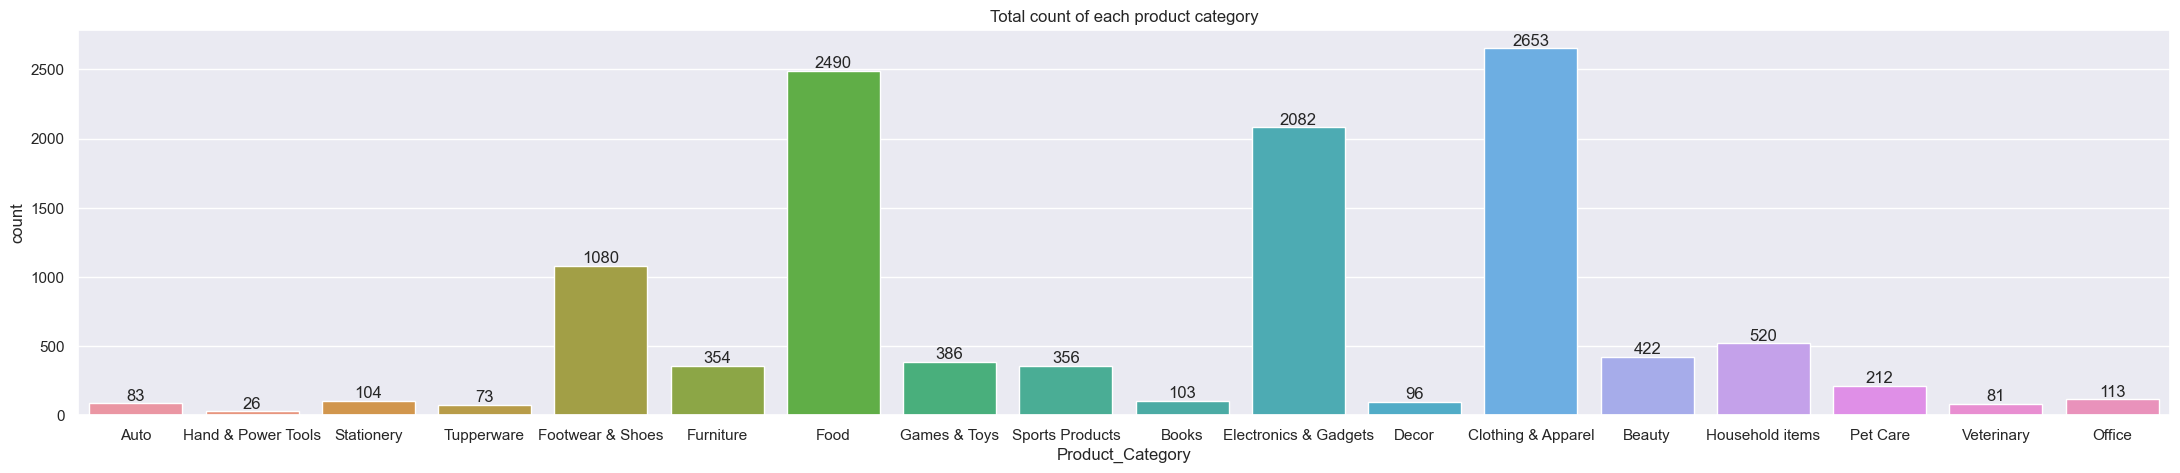

In [180]:
fig, ax = plt.subplots(figsize=(27,5))
ax = sns.countplot(data = df, x = 'Product_Category')
plt.title("Total count of each product category")

for bars in ax.containers:
    ax.bar_label(bars)



Text(0.5, 1.0, 'Total amount spent on each product category')

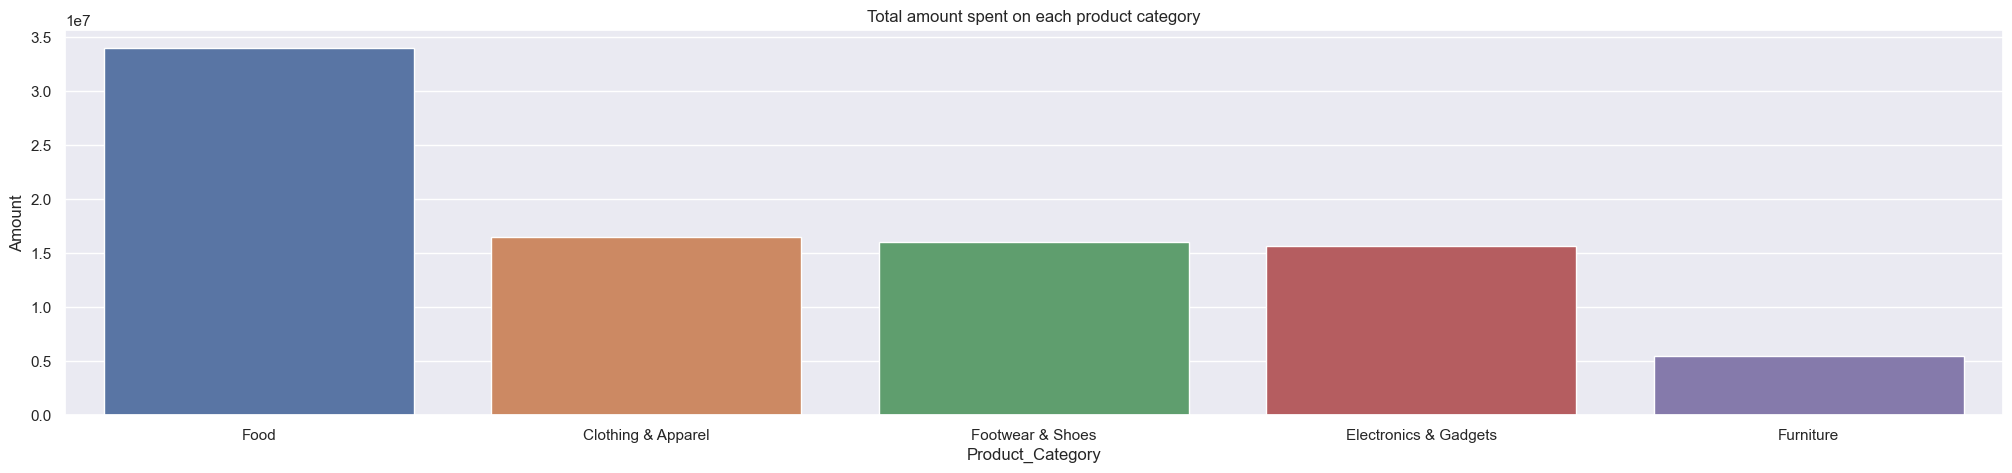

In [181]:

sales_category_amount = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(5)
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(data = sales_category_amount, x = 'Product_Category',y= 'Amount')
plt.title("Total amount spent on each product category")


#### Conclusion
Maximum products sold are from clothes and apparel category, whereas maximum amount is spent in stationary category

#### State wise Analysis 

Text(0.5, 1.0, 'Total orders per state')

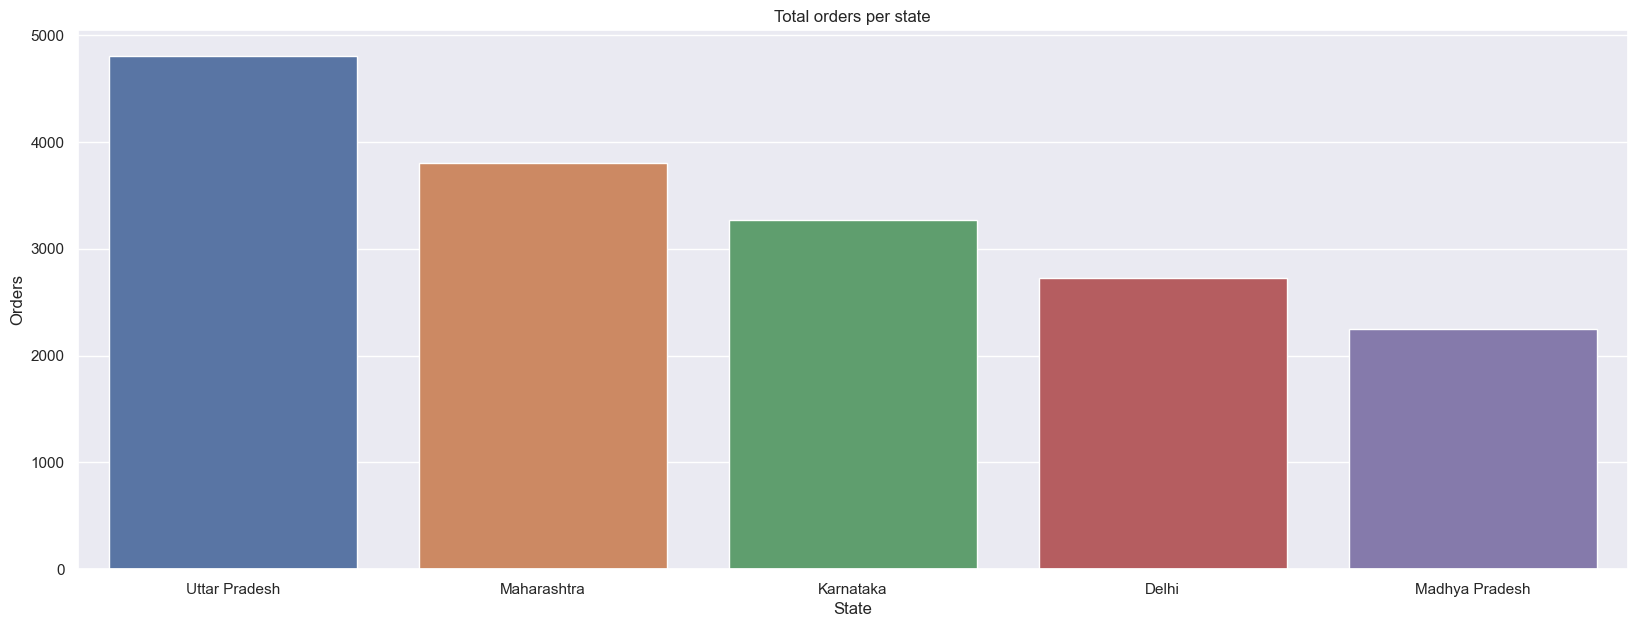

In [182]:
# total number of orders per state

state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(5)

fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data = state, x = 'State',y= 'Orders')
plt.title("Total orders per state")





,State,Amount
14,Uttar Pradesh,19360148.00
10,Maharashtra,14400762.00
7,Karnataka,13705829.00
2,Delhi,11554343.95
9,Madhya Pradesh,8100944.00


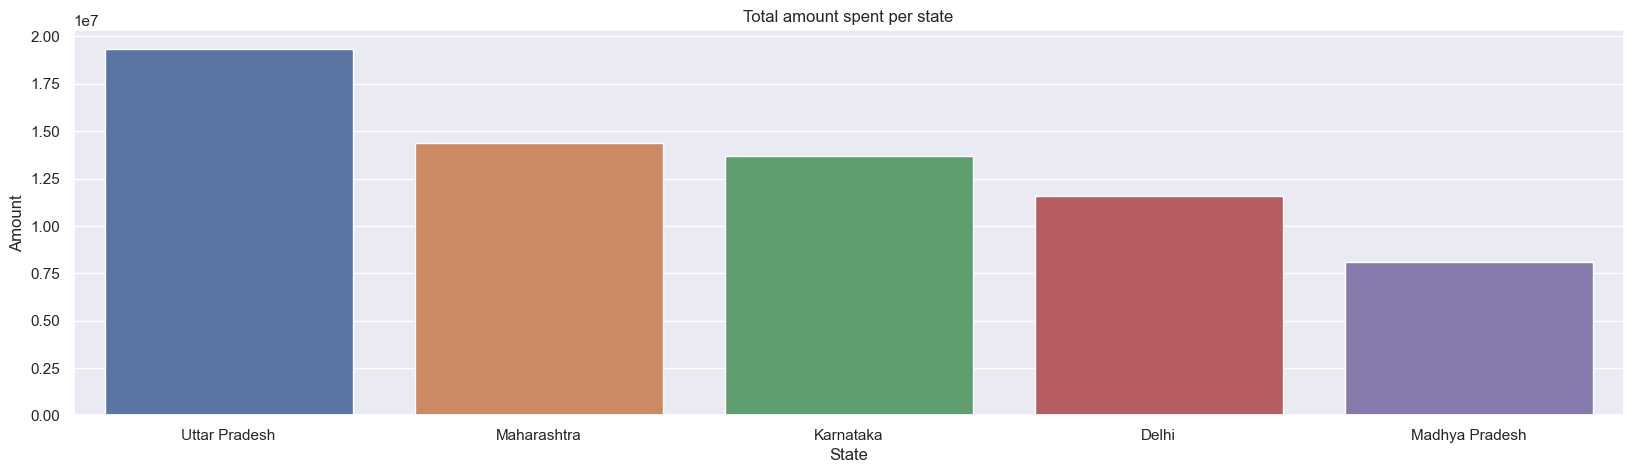

In [183]:
# total amount spent per state

state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
fig, ax = plt.subplots(figsize=(20,5))

sns.barplot(data = state, x = 'State',y= 'Amount')
plt.title("Total amount spent per state")
state

#### Conclusion
- Uttar pradesh has a placed maximum number of orders
- Delhi has spent maximum amount on orders

#### Occupation Wise Analysis

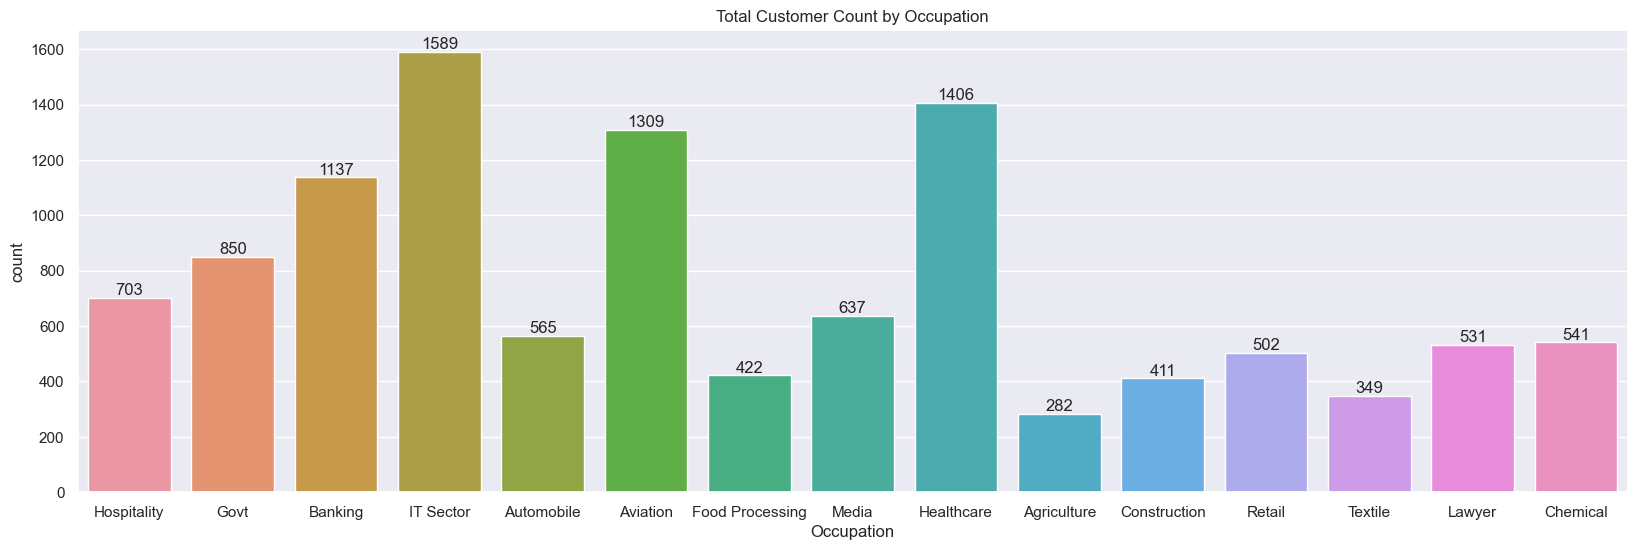

In [184]:
occupation = df.groupby(['Occupation'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

# plot the data on a bar graph
fig, ax = plt.subplots(figsize=(20,6))
occupation_plot = sns.countplot(data = df, x = 'Occupation')
plt.title("Total Customer Count by Occupation")

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Amount spent by customer accoring to their occupation')

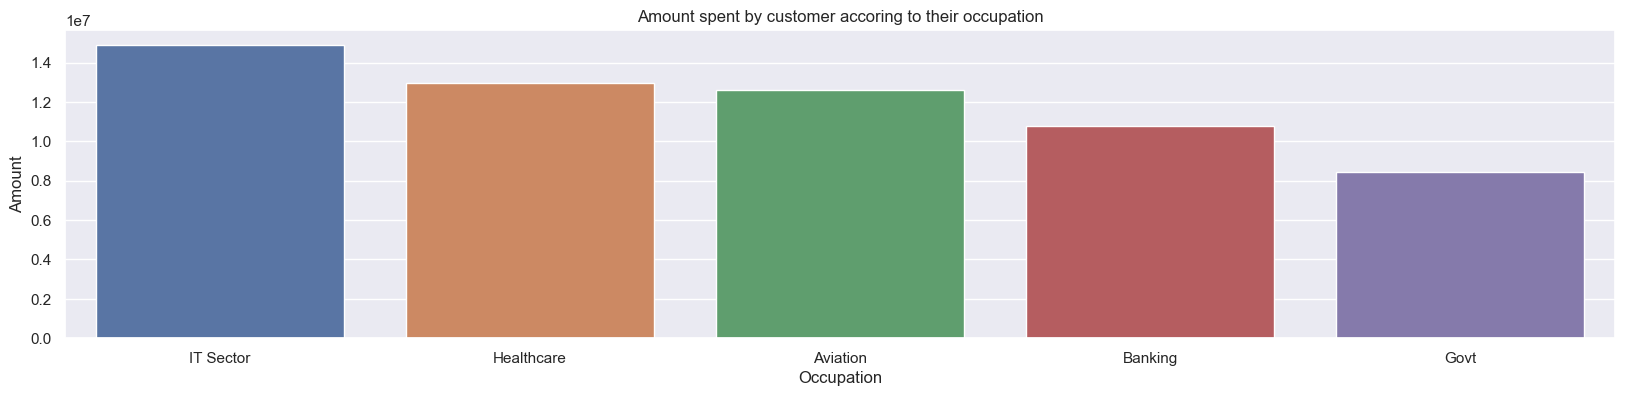

In [126]:
occupation_data = df.groupby(['Occupation'], as_index = False).sum("Amount").sort_values(by= 'Amount', ascending = False).head()

# plot the data
fig, ax = plt.subplots(figsize=(20,4))
graph_plot = sns.barplot(x= 'Occupation', y = 'Amount', data = occupation_data)
plt.title("Amount spent by customer accoring to their occupation")


#### Conclusion
- IT Sector customers have placed more number of orders.
- Customer who have Media as their occupation have spent more ammount 

#### Product ID wise anaylsis

Text(0.5, 1.0, 'Number of orders per Product ID')

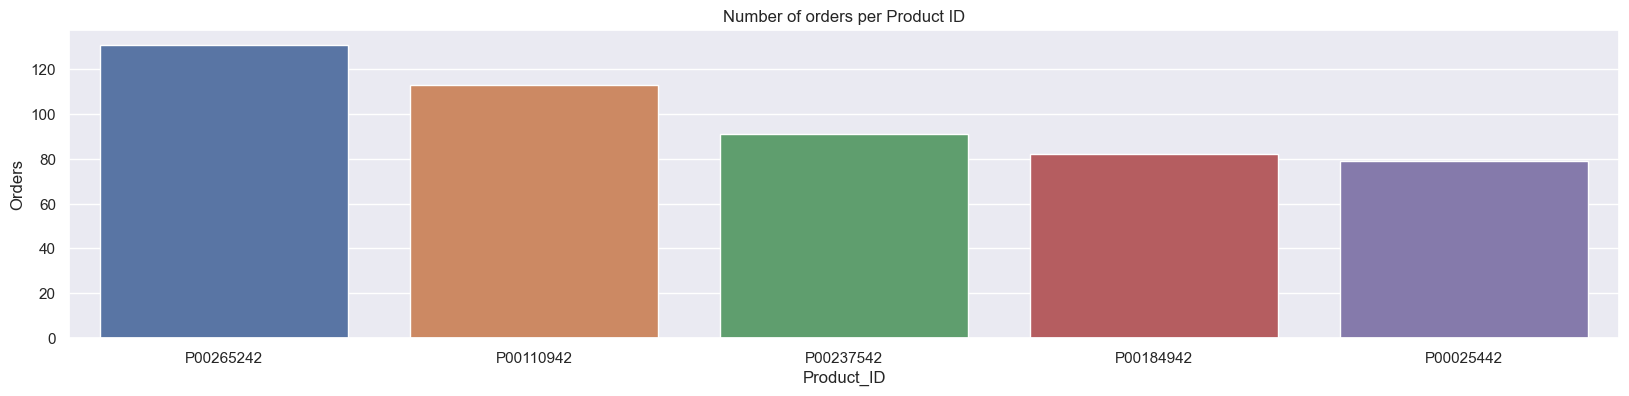

In [186]:
product_id = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data = product_id, x = 'Product_ID',y= 'Orders')
plt.title("Number of orders per Product ID")

Text(0.5, 1.0, 'Amount spent on each Product ID')

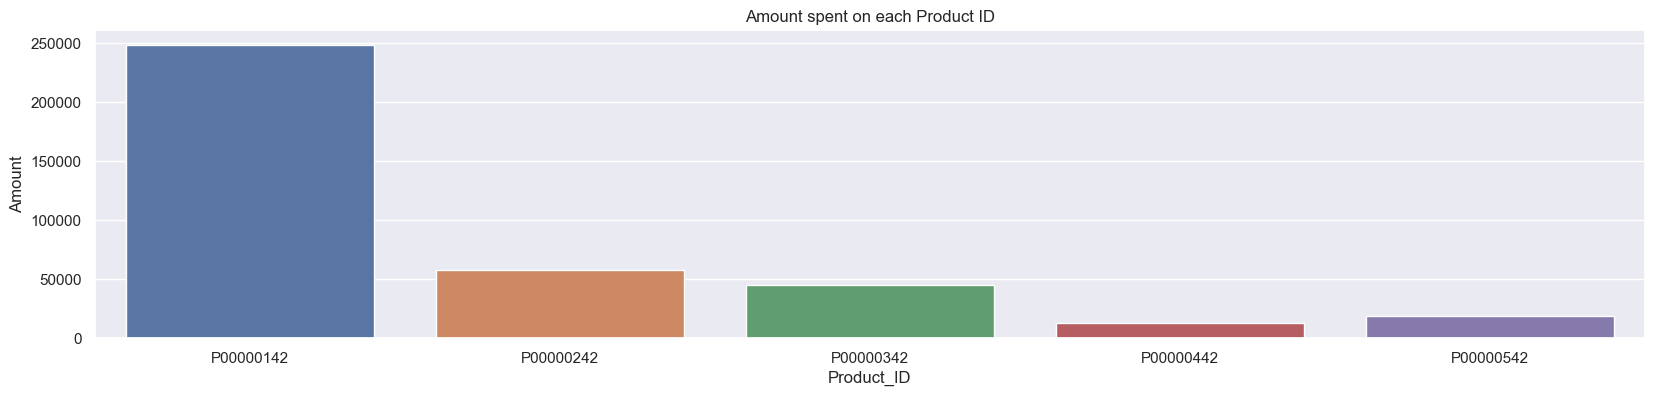

In [185]:
product_id_amount = df.groupby(['Product_ID'], as_index = False).sum("Amount").head()
fig, ax = plt.subplots(figsize=(20,4))
graph_plot = sns.barplot(x= 'Product_ID', y = 'Amount', data = product_id_amount)
plt.title("Amount spent on each Product ID")

#### Conclusion
Customers have placed more number of orders for the OrderID P00000142 and have spent significantly spent more money on it.

## Final conclusion
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.